# Togo Solar Data Discovery

### Inspection & Cleaning

In [20]:
import sys
import os


sys.path.append(os.path.abspath("../src"))
from data_loader import load_csv

file_path = "../data/togo-dapaong_qc.csv"
df = load_csv(file_path)

df.head()

2025-05-18 11:24:08,698 - INFO - Successfully loaded data from ../data/togo-dapaong_qc.csv with shape (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [22]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


#### Note

- Data looks same as Benin and Sierra Leone data so same cleaning steps will be taken.

In [23]:
# Remove comments column, change timestamp to datetime, and remove negative irradiance values
import pandas as pd

df.drop(columns=["Comments"], inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

irradiance_cols = ['GHI', 'DNI', 'DHI']
day_time_df = df[~df[irradiance_cols].lt(0).any(axis=1)]
day_time_df = day_time_df[day_time_df['GHI'] > 0]

day_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267553 entries, 343 to 525587
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      267553 non-null  datetime64[ns]
 1   GHI            267553 non-null  float64       
 2   DNI            267553 non-null  float64       
 3   DHI            267553 non-null  float64       
 4   ModA           267553 non-null  float64       
 5   ModB           267553 non-null  float64       
 6   Tamb           267553 non-null  float64       
 7   RH             267553 non-null  float64       
 8   WS             267553 non-null  float64       
 9   WSgust         267553 non-null  float64       
 10  WSstdev        267553 non-null  float64       
 11  WD             267553 non-null  float64       
 12  WDstdev        267553 non-null  float64       
 13  BP             267553 non-null  int64         
 14  Cleaning       267553 non-null  int64         
 15  Pre

In [24]:
day_time_df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,267553,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000,267553.000000
mean,2022-04-28 14:36:51.341977088,455.204740,297.142814,228.729565,444.203653,431.287204,29.882752,50.881561,2.899102,3.953599,0.650735,171.415919,13.122879,975.955792,0.001050,0.001555,40.023742,42.490587
min,2021-10-25 05:44:00,0.100000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.700000,13.400000
25%,2022-01-29 08:22:00,158.200000,7.300000,113.200000,145.800000,142.400000,26.400000,22.700000,1.900000,2.600000,0.500000,83.200000,10.100000,975.000000,0.000000,0.000000,32.000000,33.100000
50%,2022-05-01 10:59:00,431.700000,235.300000,211.900000,412.200000,401.200000,29.900000,55.100000,2.800000,3.900000,0.600000,202.800000,12.900000,976.000000,0.000000,0.000000,40.400000,42.700000
75%,2022-07-27 07:13:00,744.600000,548.700000,330.700000,734.200000,711.300000,33.500000,74.500000,3.800000,5.200000,0.800000,240.700000,16.000000,978.000000,0.000000,0.000000,47.800000,51.400000
max,2022-10-24 23:48:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,22.900000,4.400000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000
std,NaN,318.689138,283.500887,149.821928,317.786968,308.180073,4.819919,27.845280,1.473057,1.849164,0.264976,89.271765,5.634139,2.343213,0.032391,0.029485,10.407424,12.039009


### Outliers and detection

In [25]:
from scipy.stats import zscore
import numpy as np

# Calculate z-scores for major columns
major_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for column in major_cols:
    z_scores = zscore(day_time_df[column])
    day_time_df[f'outlier_{column}'] = (np.abs(z_scores) > 3)

outlier_summary = {col: day_time_df[f'outlier_{col}'].sum() for col in major_cols}
print("Outlier counts per column:", outlier_summary)

Outlier counts per column: {'GHI': np.int64(5), 'DNI': np.int64(0), 'DHI': np.int64(185), 'ModA': np.int64(0), 'ModB': np.int64(2), 'WS': np.int64(1011), 'WSgust': np.int64(1156)}


#### Note

- No outliers for columns DNI and ModA.
- Small number of outliers for GHI and ModB.
- Significant number for outliers for DHI, WS and WSgust.

2025-05-18 11:24:11,071 - INFO - PlotGenerator initialized successfully.


2025-05-18 11:24:11,544 - INFO - Boxplot for GHI created successfully.
2025-05-18 11:24:11,985 - INFO - Boxplot for ModB created successfully.


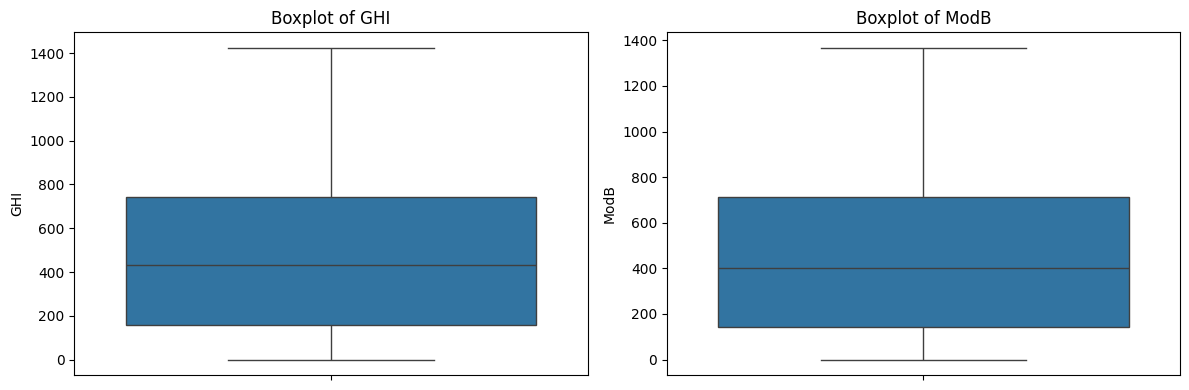

In [26]:
# boxplots for columns with small number of outliers
from plot_generator import PlotGenerator

plot_gen = PlotGenerator()
plot_gen.plot_box(df=day_time_df, columns=['GHI', 'ModB'])

#### Note

- Box plots show outliers are insignificant for these columns, and should not be handeled.

2025-05-18 11:24:12,682 - INFO - Boxplot for DHI created successfully.
2025-05-18 11:24:13,151 - INFO - Boxplot for WS created successfully.
2025-05-18 11:24:13,637 - INFO - Boxplot for WSgust created successfully.


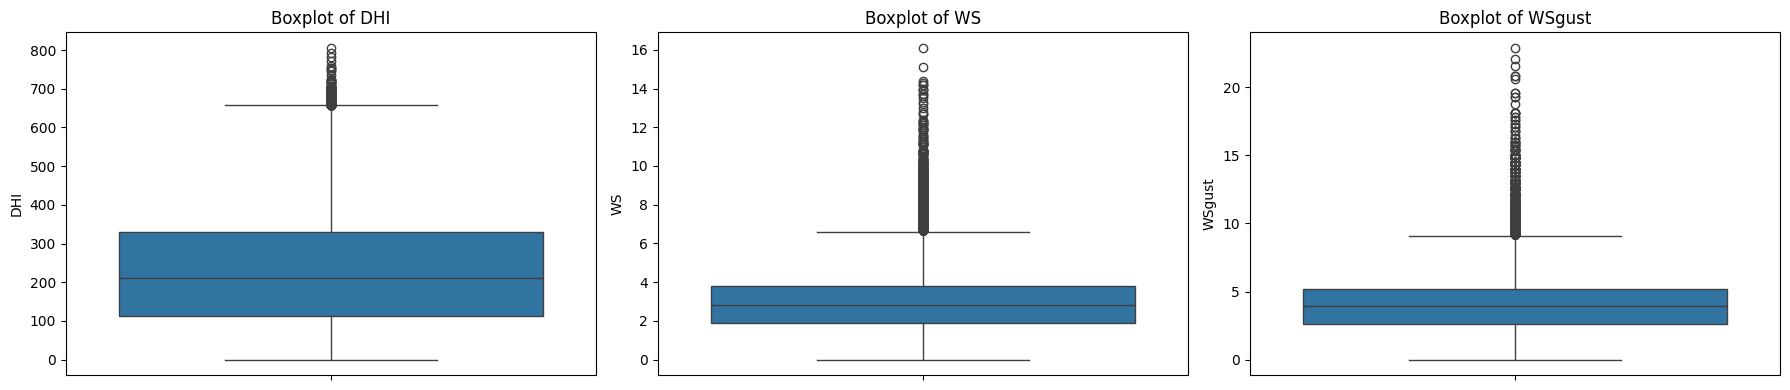

In [27]:
# boxplots for columns with large number of outliers
plot_gen.plot_box(df=day_time_df, columns=['DHI', 'WS', 'WSgust'])

2025-05-18 11:24:14,521 - INFO - Time Series for DHI created successfully.
2025-05-18 11:24:14,951 - INFO - Time Series for WS created successfully.
2025-05-18 11:24:15,405 - INFO - Time Series for WSgust created successfully.


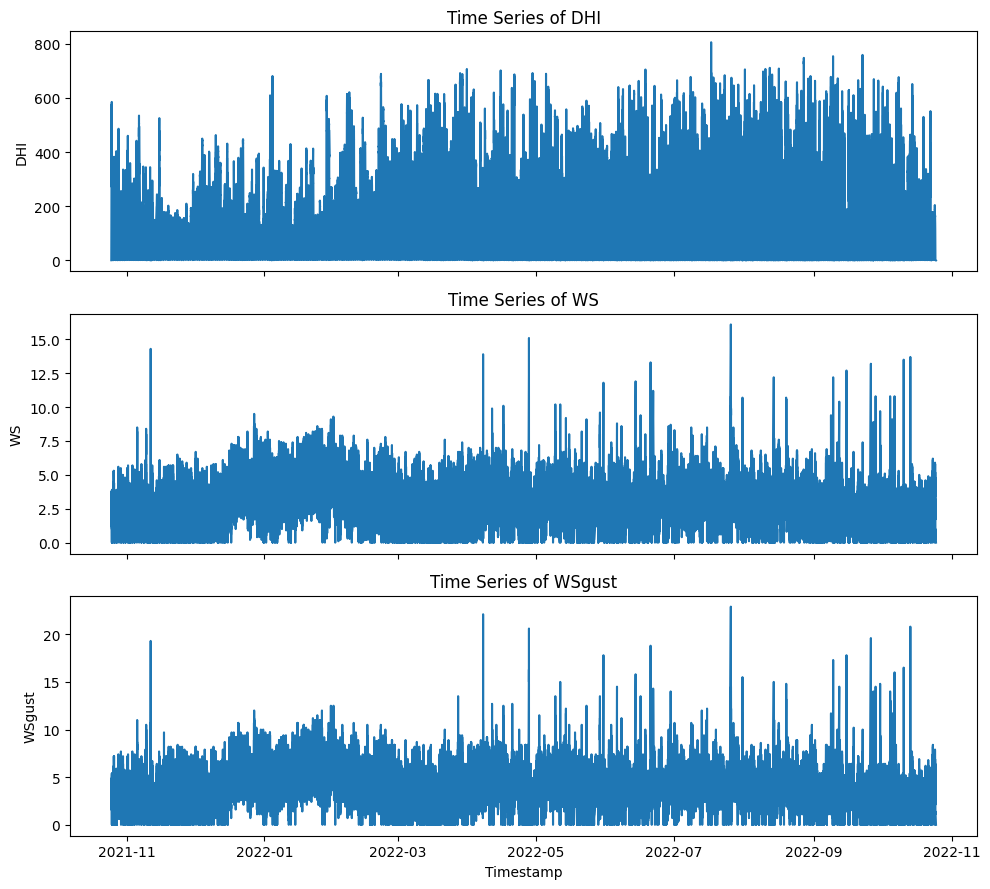

In [28]:
# TS plot for further analysis
plot_gen.plot_time_series(df=day_time_df, columns=['DHI', 'WS', 'WSgust'], time_column='Timestamp')

#### Note

- The box plots clearly indicate the presence of outliers in all three variables: DHI, WS, and WSgust, particularly on the higher end.

- Looking at the time series plots, we can see that these high values, while appearing as outliers in the box plots, seem to be part of the natural variability of the data over time. For instance, DHI shows periods of higher irradiance, and both WS and WSgust exhibit spikes indicative of stronger wind events.

- Given that these high values appear to be genuine measurements reflecting actual conditions rather than errors, it would be more appropriate to keep these data points and use them in the analysis. Removing or imputing them could lead to a loss of valuable information about the range and fluctuations of these important weather variables.

In [29]:
# Calculate z-scores for other columns
other_cols = ['Tamb', 'BP', 'Precipitation', 'TModA', 'TModB']

for column in other_cols:
    z_scores = zscore(day_time_df[column])
    day_time_df[f'outlier_{column}'] = (np.abs(z_scores) > 3)

outlier_summary = {col: day_time_df[f'outlier_{col}'].sum() for col in other_cols}
print("Outlier counts per column:", outlier_summary)

Outlier counts per column: {'Tamb': np.int64(73), 'BP': np.int64(150), 'Precipitation': np.int64(1657), 'TModA': np.int64(0), 'TModB': np.int64(260)}


#### Note

- No outliers for TModA
- significant number of outliers for other columns.

2025-05-18 11:24:16,743 - INFO - Boxplot for Tamb created successfully.
2025-05-18 11:24:17,225 - INFO - Boxplot for BP created successfully.
2025-05-18 11:24:17,701 - INFO - Boxplot for Precipitation created successfully.
2025-05-18 11:24:18,161 - INFO - Boxplot for TModB created successfully.


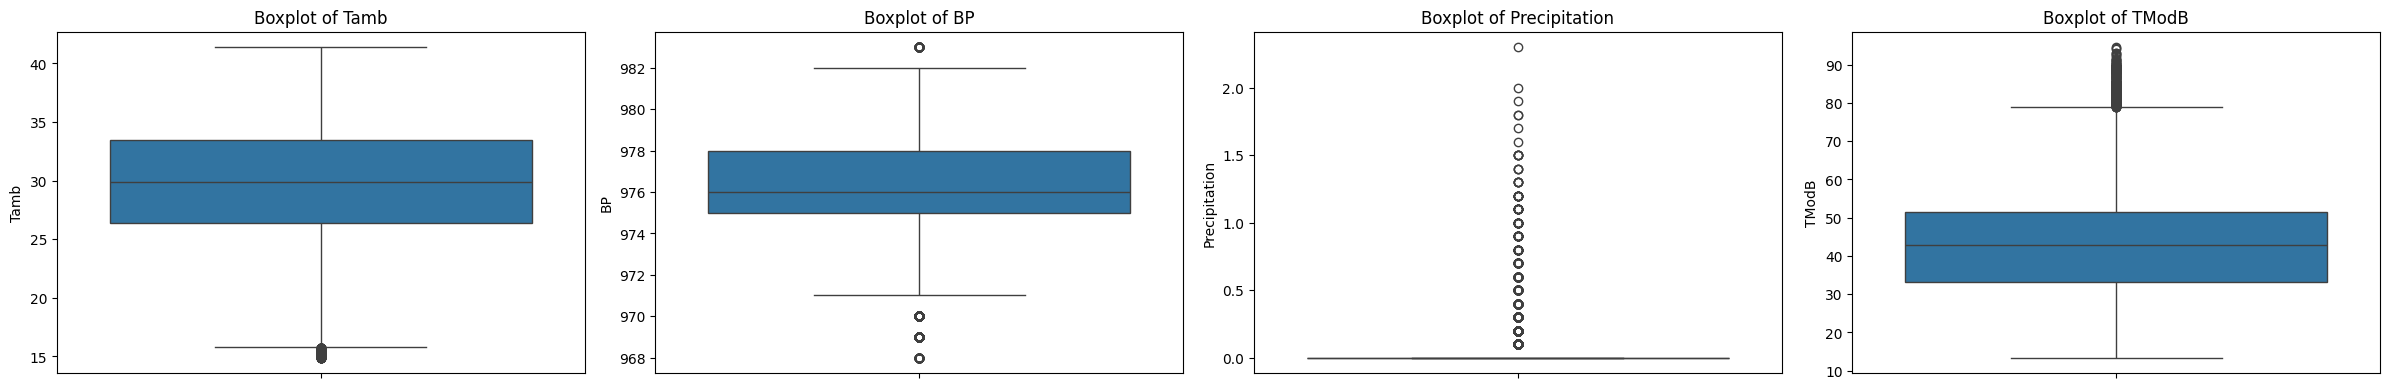

In [30]:
# boxplot for columns with outliers
plot_gen.plot_box(df=day_time_df, columns=['Tamb', 'BP', 'Precipitation', 'TModB'])

2025-05-18 11:24:19,055 - INFO - Time Series for Tamb created successfully.
2025-05-18 11:24:19,430 - INFO - Time Series for BP created successfully.
2025-05-18 11:24:19,820 - INFO - Time Series for Precipitation created successfully.
2025-05-18 11:24:20,216 - INFO - Time Series for TModB created successfully.


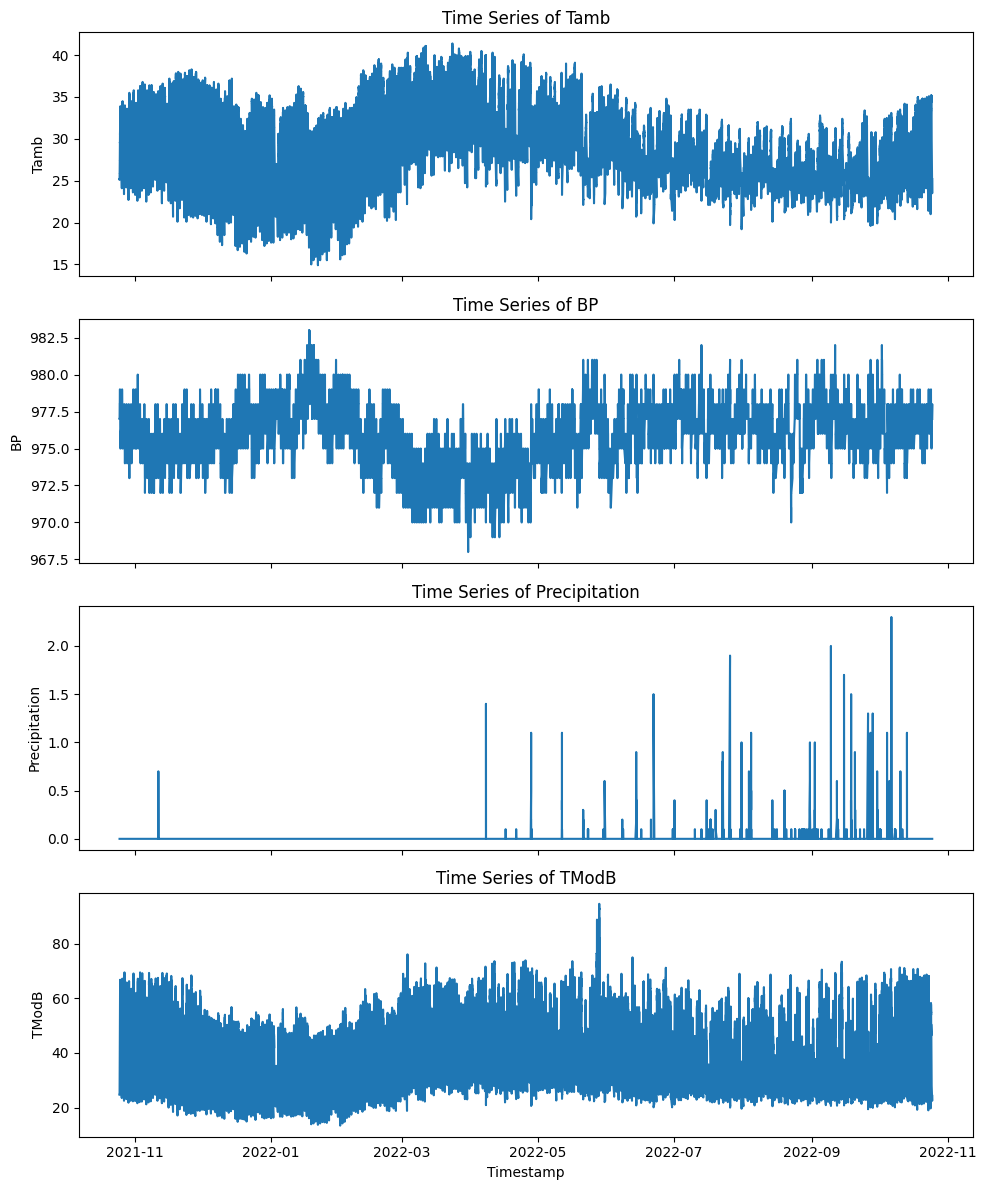

In [31]:
# TS for further analysis
plot_gen.plot_time_series(df=day_time_df, columns=['Tamb', 'BP', 'Precipitation', 'TModB'], time_column='Timestamp')

#### Note

- Similar to the previous variables, the apparent outliers in Tamb, BP, Precipitation, and TModB seem to represent genuine variations and events captured by the sensors over time.

- Therefore, my recommended approach is to retain these data points and include them in my analysis.

In [32]:
# Drop outlier columns and save clean data to csv
day_time_df.drop(columns=[f'outlier_{col}' for col in major_cols + other_cols], inplace=True)
day_time_df.to_csv("../data/togo-dapaong_qc_clean.csv", index=False)

### TSA

In [33]:
# Load clean data
clean_df = load_csv("../data/togo-dapaong_qc_clean.csv")
clean_df.head()

2025-05-18 11:24:28,769 - INFO - Successfully loaded data from ../data/togo-dapaong_qc_clean.csv with shape (267553, 18)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 05:44:00,0.2,0.0,0.7,1.4,1.4,25.2,92.7,1.4,1.9,0.4,231.2,5.8,977,0,0.0,25.0,24.7
1,2021-10-25 05:45:00,0.5,0.0,0.8,1.6,1.6,25.2,92.8,1.5,1.9,0.4,229.9,7.9,977,0,0.0,25.0,24.7
2,2021-10-25 05:46:00,0.8,0.0,0.9,1.9,1.9,25.2,92.6,1.6,2.1,0.4,230.1,7.0,977,0,0.0,25.0,24.7
3,2021-10-25 05:47:00,1.0,0.0,1.0,2.1,2.1,25.1,92.5,1.6,1.9,0.4,230.0,7.0,977,0,0.0,25.0,24.7
4,2021-10-25 05:48:00,1.2,0.0,1.1,2.3,2.3,25.1,92.6,1.6,1.9,0.4,229.3,6.7,977,0,0.0,25.0,24.7


In [34]:
# Make timestamp column a datetime object
clean_df['Timestamp'] = pd.to_datetime(clean_df['Timestamp'])

In [35]:
# Aggregate relevant columns by hour
clean_df['Hour'] = clean_df['Timestamp'].dt.hour
hourly_agg = clean_df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()
hourly_agg.head()

,Hour,GHI,DNI,DHI,Tamb
0,0,0.209677,0.0,0.0,22.641935
1,1,0.129167,0.0,0.0,23.129167
2,2,0.316667,0.0,0.0,23.338889
3,3,0.465385,0.0,0.0,21.780769
4,4,0.570000,0.0,0.0,22.040000


2025-05-18 11:25:39,871 - INFO - Time Series for GHI created successfully.
2025-05-18 11:25:39,923 - INFO - Time Series for DNI created successfully.
2025-05-18 11:25:39,971 - INFO - Time Series for DHI created successfully.
2025-05-18 11:25:40,029 - INFO - Time Series for Tamb created successfully.


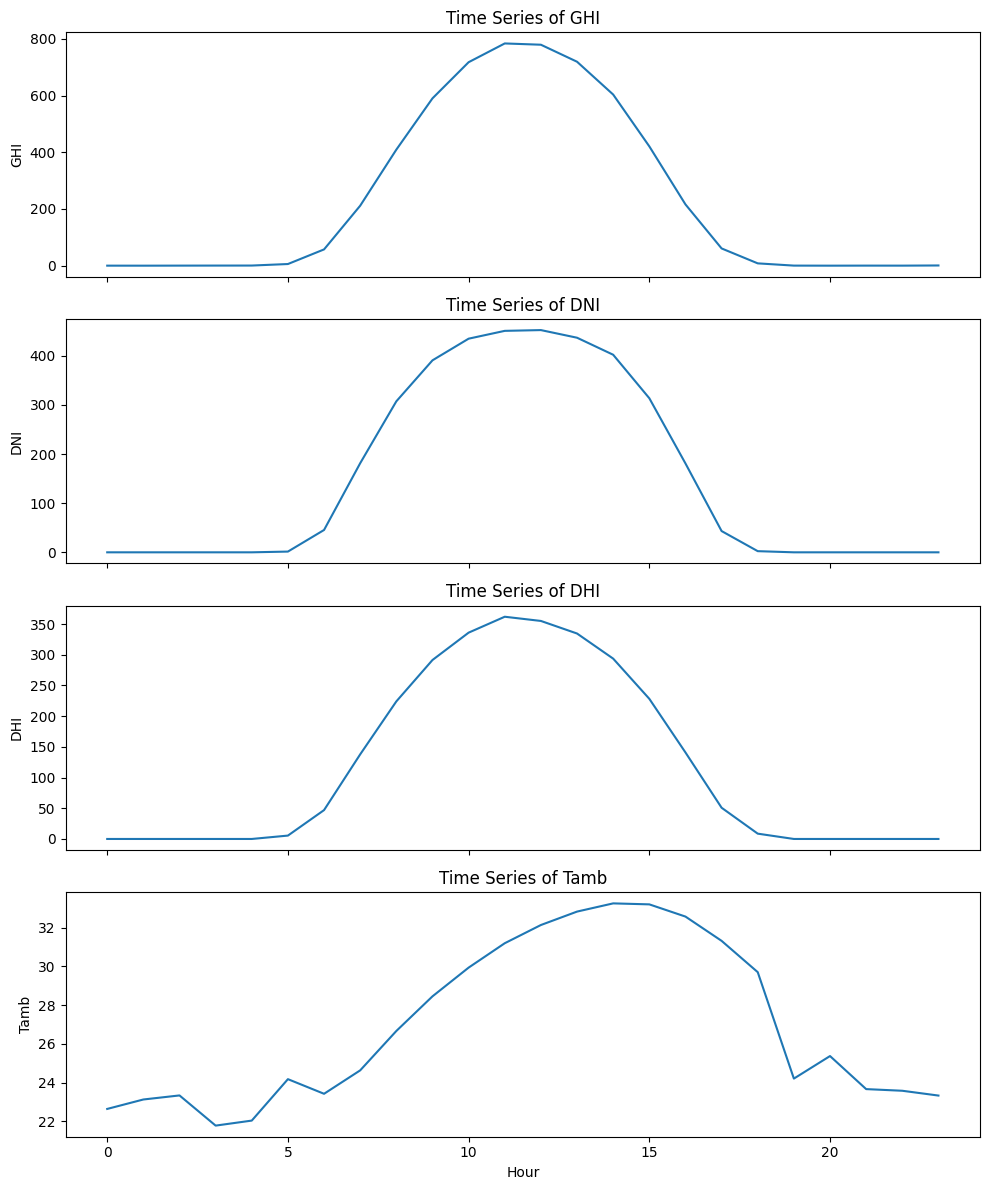

In [36]:
# Plot TSA for hourly data
plot_gen.plot_time_series(df=hourly_agg, columns=['GHI', 'DNI', 'DHI', 'Tamb'], time_column='Hour')

#### Note

- Although the hourly data exhibits the same diurinal behaiour as of the Benin and Sierra Leone data it shows a lower irrdiance and temperature measurments compared to them.

In [37]:
# Aggregate relevant columns by day
clean_df['Date'] = clean_df['Timestamp'].dt.date
daily_agg = clean_df.groupby('Date')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()
daily_agg.head()

,Date,GHI,DNI,DHI,Tamb
0,2021-10-25,437.110460,225.376290,280.482427,30.240028
1,2021-10-26,530.613043,488.773072,199.237027,30.765638
2,2021-10-27,520.149155,449.832113,203.308028,30.144930
3,2021-10-28,506.569155,448.160986,212.001549,30.199296
4,2021-10-29,541.144711,557.196756,161.832017,30.686037


2025-05-18 11:29:41,538 - INFO - Time Series for GHI created successfully.
2025-05-18 11:29:41,580 - INFO - Time Series for DNI created successfully.
2025-05-18 11:29:41,631 - INFO - Time Series for DHI created successfully.
2025-05-18 11:29:41,684 - INFO - Time Series for Tamb created successfully.


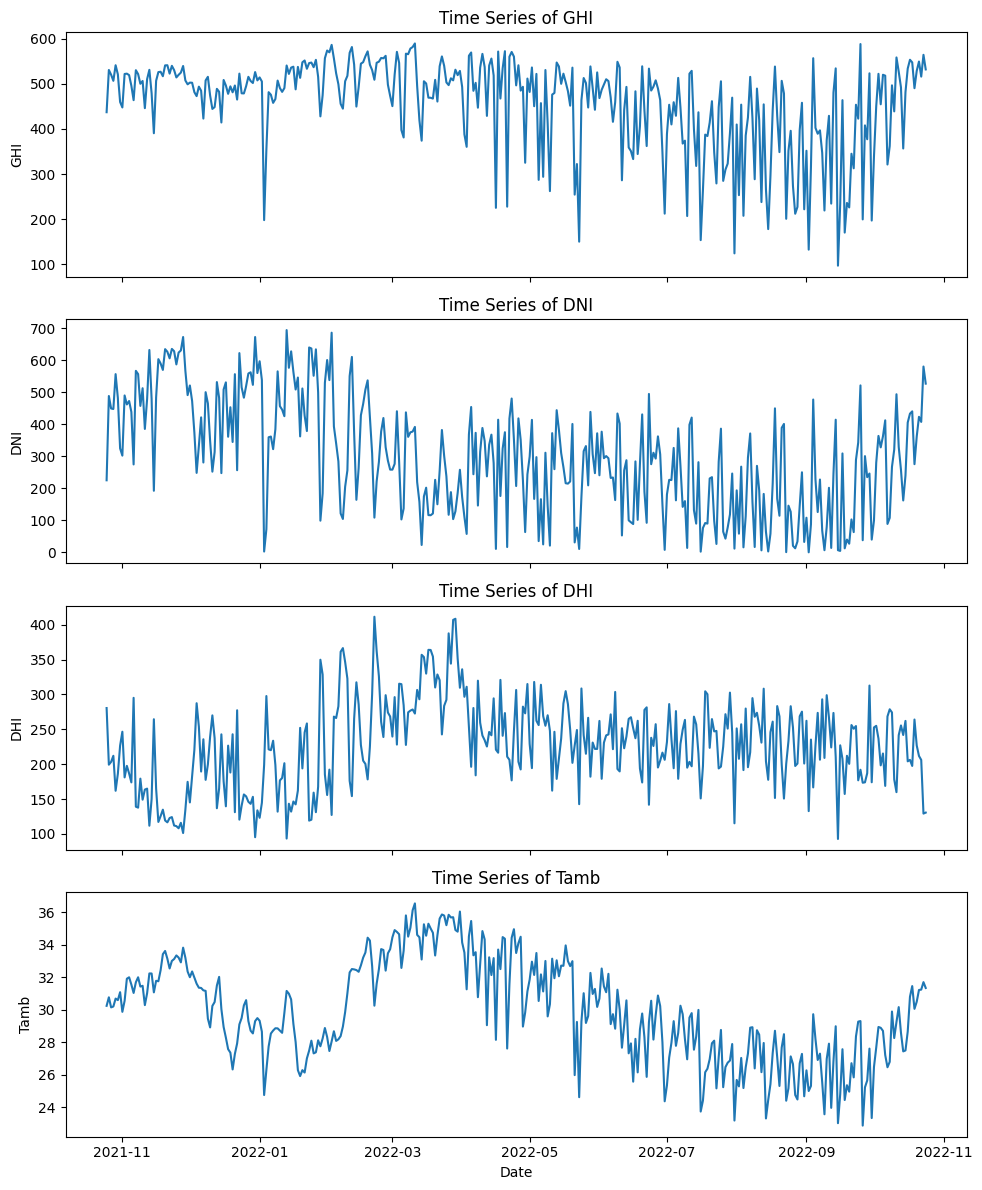

In [38]:
# plot TSA for daily data
plot_gen.plot_time_series(df=daily_agg, columns=['GHI', 'DNI', 'DHI', 'Tamb'], time_column='Date')

#### Note

- Significant Daily Variability: All four variables show substantial fluctuations on a daily basis, highlighting the dynamic nature of weather and solar radiation.

- Seasonal Trends: Both solar radiation components (GHI, DNI, DHI) and ambient temperature exhibit clear seasonal patterns, which is expected due to the Earth's tilt and its orbit around the sun.

- Interrelationships: We can infer some relationships between these variables. For instance, periods of high GHI often correspond to periods of potentially high DNI and DHI, and the seasonal temperature trend generally follows the solar radiation trend with a lag. However, cloudy days can lead to high DHI and low DNI.

In [39]:
# aggregate relevant columns by month
clean_df['Month'] = clean_df['Timestamp'].dt.month
monthly_agg = clean_df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()
monthly_agg.head()

,Month,GHI,DNI,DHI,Tamb
0,1,498.916910,455.539275,187.578574,28.125672
1,2,530.084856,351.716557,268.206691,31.541086
2,3,504.981424,228.827804,313.730578,34.947835
3,4,487.984490,276.600709,253.451396,32.667981
4,5,449.795873,243.046252,240.974398,31.271210


2025-05-18 13:39:30,706 - INFO - Time Series for GHI created successfully.
2025-05-18 13:39:30,729 - INFO - Time Series for DNI created successfully.
2025-05-18 13:39:30,765 - INFO - Time Series for DHI created successfully.
2025-05-18 13:39:30,811 - INFO - Time Series for Tamb created successfully.


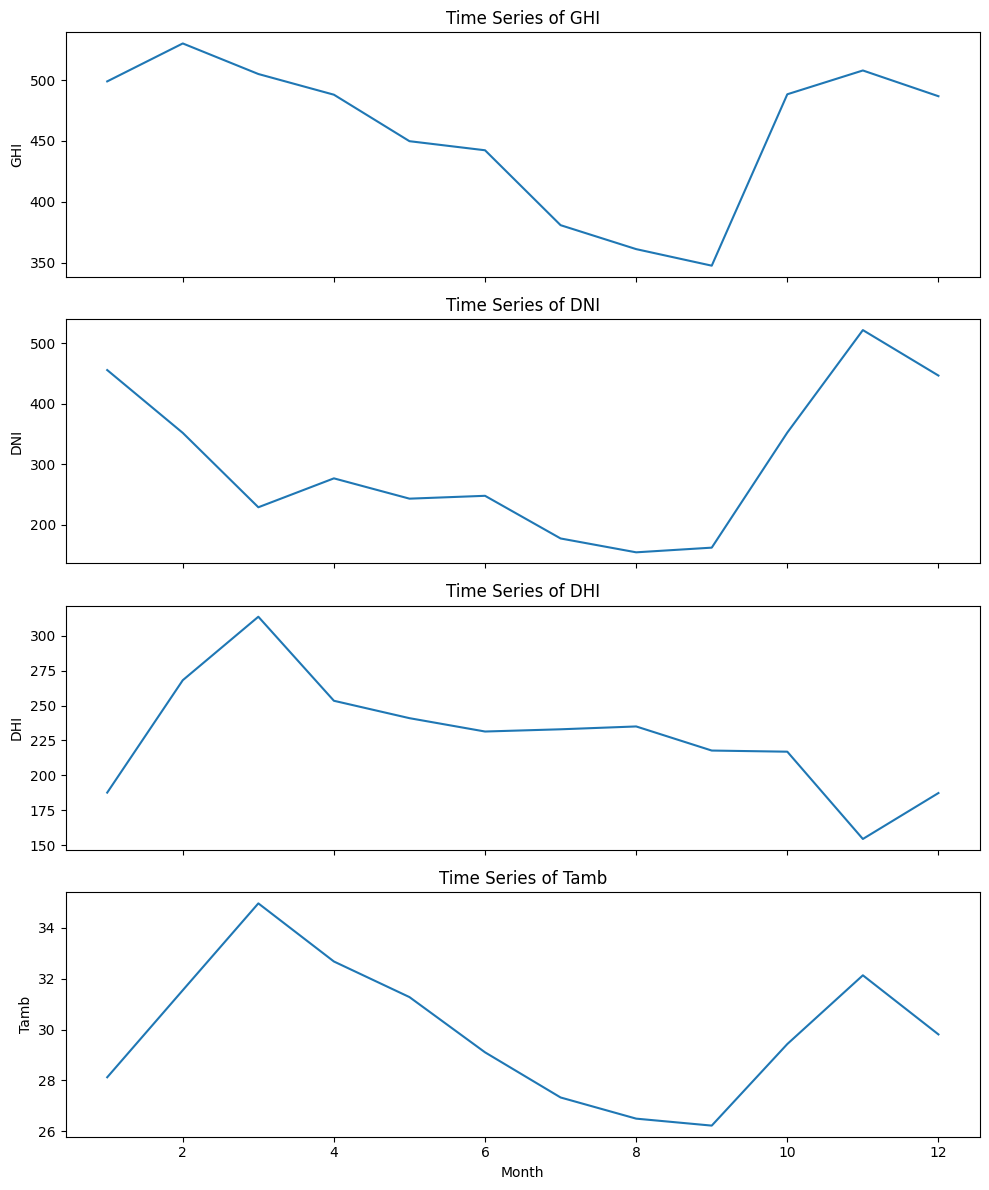

In [40]:
# plot TSA for monthly data
plot_gen.plot_time_series(df=monthly_agg, columns=['GHI', 'DNI', 'DHI', 'Tamb'], time_column='Month')

#### Note

- The monthly aggregation clearly reveals the underlying seasonal patterns for all four variables. Solar radiation (GHI, DNI, DHI) peaks around the middle of the year, driving a similar but slightly delayed peak in ambient temperature.
  
- Solar Component Relationships: GHI, being the total radiation, shows a strong seasonal trend. DNI, the direct component, follows this trend but can be more sensitive to monthly variations in cloud cover. DHI, the diffuse component, is more consistent throughout the year but still influenced by the overall solar input.

- Temperature Response: Ambient temperature closely follows the seasonal solar radiation cycle, demonstrating the direct impact of solar energy on the local climate. The lag between peak solar radiation and peak temperature is a common phenomenon in all three countries.

### Impact of cleaning

In [41]:
# Group data set by cleaning
cleaning_groups = clean_df.groupby('Cleaning')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
cleaning_groups.head()

,GHI,DNI,DHI,Tamb
Cleaning,,,,
0,455.078421,297.070580,228.661350,29.880799
1,575.352313,365.848043,293.611388,31.740925


2025-05-18 13:43:45,552 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-18 13:43:45,757 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-18 13:43:45,855 - INFO - Grouped boxplot for GHI created successfully.
2025-05-18 13:43:46,033 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-18 13:43:46,219 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-18 13:43:46,311 - INF

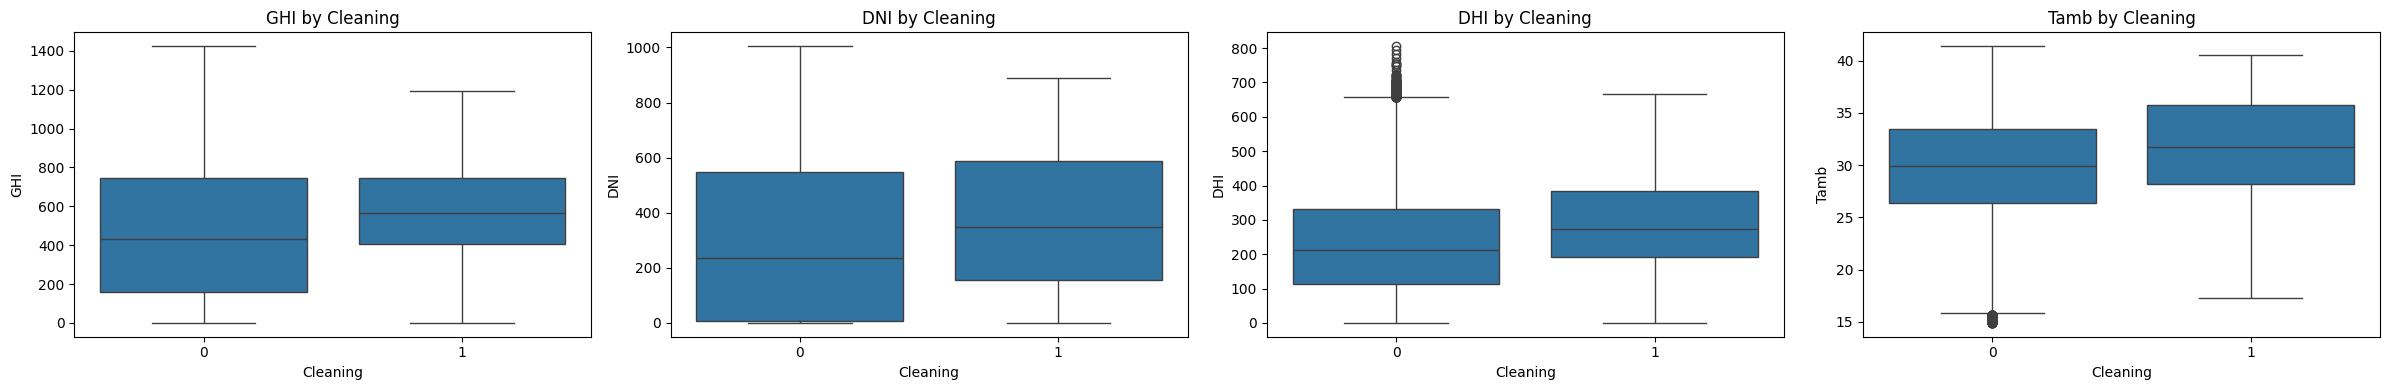

In [42]:
# Draw box plots for grouped data
plot_gen.plot_box_grouped(clean_df, columns=["GHI", "DNI", "DHI", "Tamb"], group_column="Cleaning")

#### Note

- The box plots suggest that for irradiance sensors (GHI, DNI, DHI) in Togo, the measurements are slightly higher or for cleaned sensors than for uncleaned sensors. This aligns with the expected impact of cleaning on irradiance measurements while the temperature sensors results are unexpected because generally uncleaned sensors tend to accumulate dust and could overheat easily this suggests that these sensors need somekind of calibration or replacement.

#### Comparision with Benin and Sierra Leone

- The results from cleaning impact in **Benin** and **Sierra Leone** are totally opposite from results in **Togo** where irradiance measurements are opposite from expected and temperature results are as expexted. this suggests that irradiance sensors in **Benin** & **Sierra Leone** and temperature sensors from **Togo** are somewhat defected.

### Correlation using heatmap and scatter plots

2025-05-18 14:04:24,930 - INFO - Correlation heatmap created successfully.


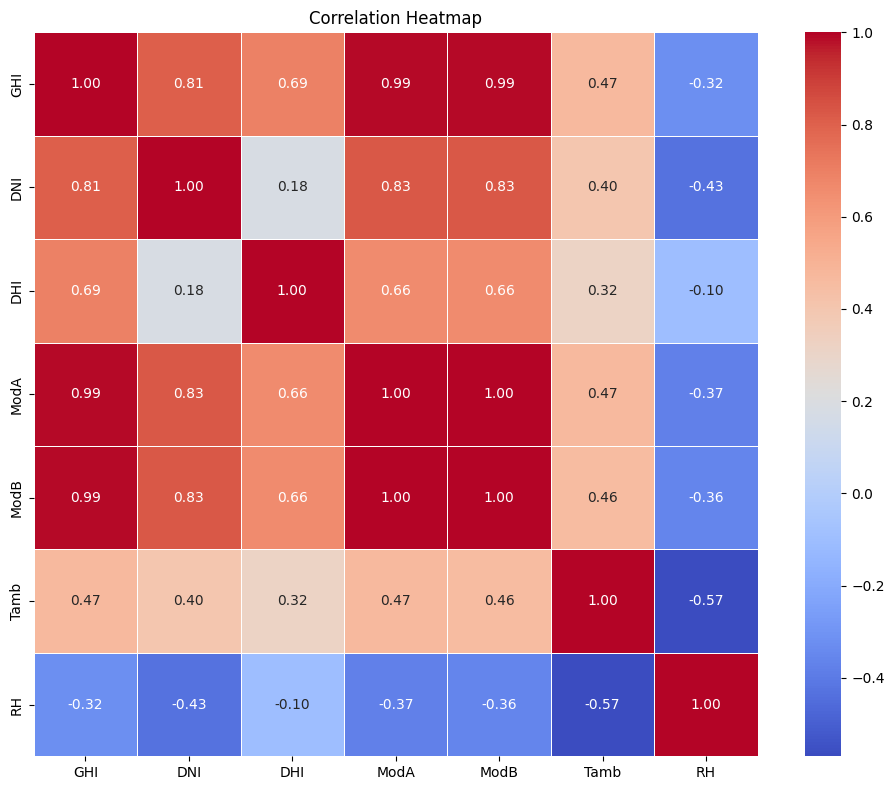

In [44]:
# Use the plot generator to create a correlation heatmap
plot_gen.plot_correlation_heatmap(clean_df, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH'])

#### Note

- The correlation heatmap shows a clear ngeative relationships between **RH** and both irradiance and  temperature measurements.
- It also shows a positive correlation between temperature and irradiance measurements indicating a higher temperature tends to produce a higher solar output.

Relatioships between the data columns is same as **Benin** and **Sierra Leone** data which is what is expected.

2025-05-18 14:08:37,140 - INFO - GHI vs WS scatter plot created successfully.


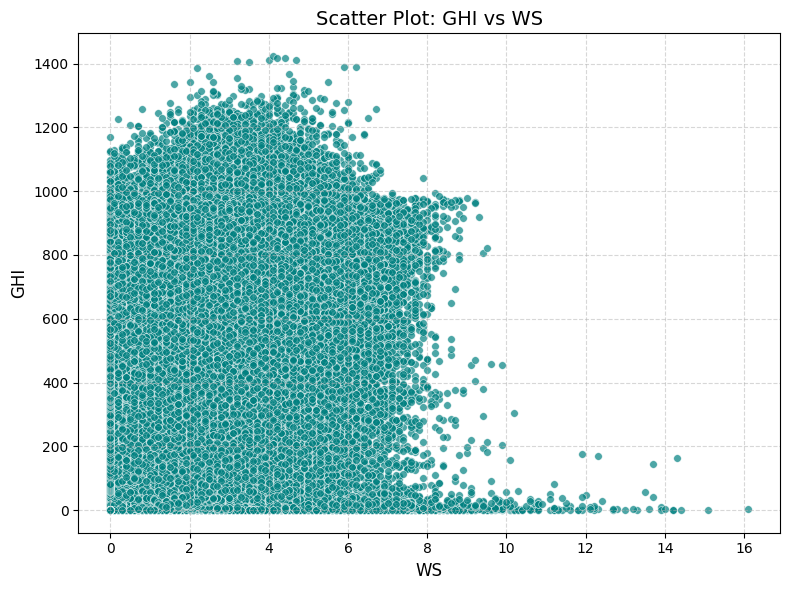

In [45]:
# Use plot generator to create a scatter plot

# 1. WS vs GHI
plot_gen.plot_scatter(clean_df, x_col='WS', y_col='GHI')

#### Note

- The scatter plot indicates that higher wind speeds (WS), particularly above approximately 7-8 m/s, are generally associated with lower Global Horizontal Irradiance (GHI) values. Conversely, a wide range of GHI values (from low to high) can be observed at lower wind speeds. This suggests that meteorological conditions leading to increased wind speeds often coincide with conditions that reduce incoming solar radiation, such as increased cloud cover.

2025-05-18 14:11:35,219 - INFO - Tamb vs RH scatter plot created successfully.


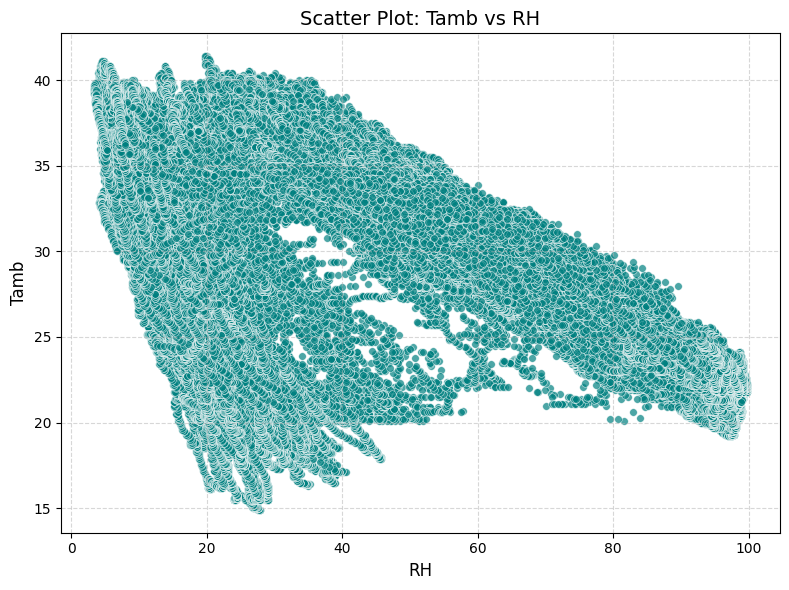

In [46]:
# 2. RH vs Tamb
plot_gen.plot_scatter(clean_df, x_col='RH', y_col='Tamb')

#### Note

- The scatter plot reveals a clear inverse relationship between Ambient Temperature (Tamb) and Relative Humidity (RH). As Tamb increases, RH tends to decrease, and conversely, as Tamb decreases, RH tends to increase. This indicates that warmer conditions are generally associated with drier air (lower relative humidity), while cooler conditions are more often linked with moister air (higher relative humidity).

#### Additional Note

- Both scatter plots confirm and aligns with the heatmap correlation.

### Wind pattern and distribution

2025-05-18 14:15:08,696 - INFO - Wind rose plot for WS vs WD created successfully.


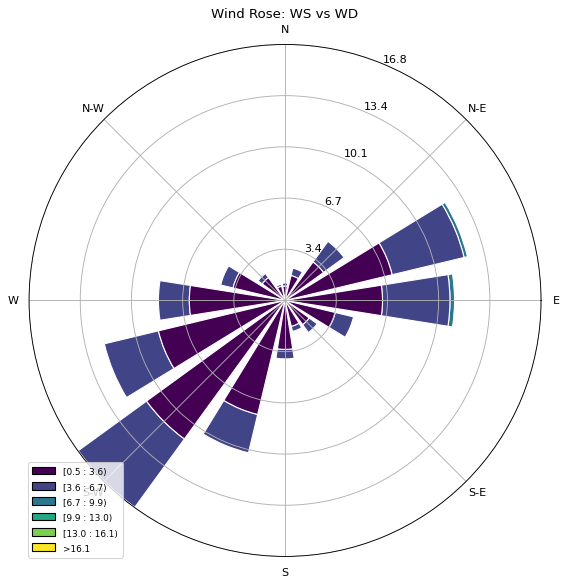

In [47]:
# Plot wind rose using WS and WD
plot_gen.plot_wind_rose(clean_df, ws_col='WS', wd_col='WD')

#### Note

- The wind rose indicates that the predominant wind directions are from the West (W) and North-West (N-W), with these directions also experiencing the highest recorded wind speeds (most frequently in the 3.6 - 9.9 m/s range, and occasionally up to 13.0 m/s). There is also a notable frequency of winds from the East (E) and North-East (N-E), though generally at lower speeds compared to the westerly winds. Winds from the Southerly quadrant (S-E, S, S-W) are the least frequent. Overall, the site is primarily influenced by westerly and north-westerly airflow.

2025-05-18 14:19:28,317 - INFO - Histogram for GHI created successfully.
2025-05-18 14:19:29,656 - INFO - Histogram for WS created successfully.


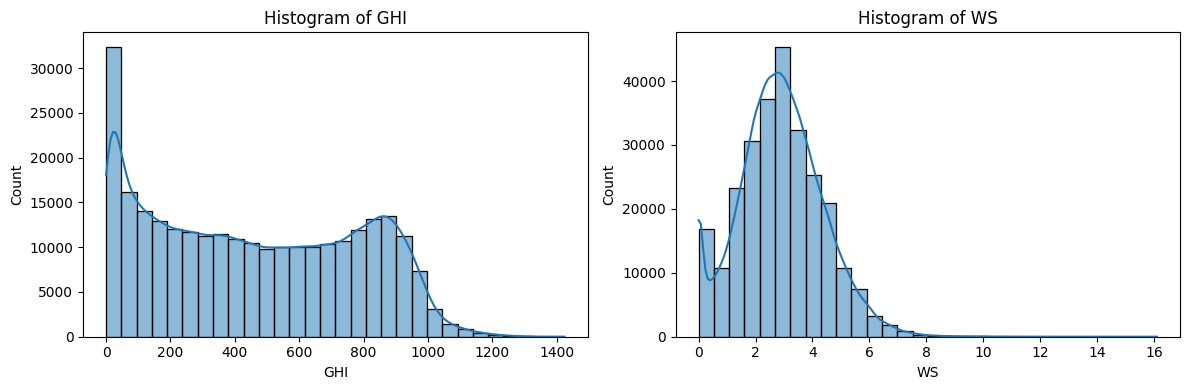

In [48]:
# Plot histograms of GHI and WS to see distribution
plot_gen.plot_histogram(clean_df, columns=['GHI', 'WS'])

#### Note

- Both GHI and WS predominantly exhibit lower values, as shown by their right-skewed distributions. GHI is characterized by a very high frequency of near-zero readings (likely due to nighttime or dense cloud cover), with a secondary spread of values during irradiated periods. Wind speed most commonly falls within a low to moderate range (around 2-4 m/s), with high wind speeds being much less frequent. While both often show low values, the reasons and specific shapes of their distributions reflect the distinct physical nature of solar irradiance versus wind patterns.